<a href="https://colab.research.google.com/github/nitheesh1213/nitheesh1213-ML-taitanic-data-training-1/blob/main/MovieDataset_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install surprise
import numpy as np
import pandas as pd
import seaborn as sns
from surprise import Reader, SVD, Dataset
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

**Solution 3.a**

In [2]:
ratings_df = pd.read_csv('ratings_small.csv')

In [5]:
ratings_df.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**Solutions 3.c, 3.d**

In [15]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
sim_options = {
    "user_based": [False, True],
}
param_grid = {"sim_options": sim_options}
result = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE','MAE'], cv=5)
result.fit(data)
results_dfRM = pd.DataFrame.from_dict(result.cv_results)
results_dfRM

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,split3_test_mae,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.916382,0.919888,0.911020,0.921874,0.912712,0.916375,0.004115,1,0.703699,0.705733,0.696506,0.702601,0.697721,0.701252,0.003546,1,3.987380,0.064886,8.014270,0.119868,{'sim_options': {'user_based': False}},{'user_based': False}
1,0.923057,0.921409,0.915044,0.927034,0.917543,0.920817,0.004197,2,0.708775,0.704912,0.698853,0.706107,0.701397,0.704009,0.003503,2,0.151938,0.003180,1.962413,0.102318,{'sim_options': {'user_based': True}},{'user_based': True}


In [17]:
results_dfRM[["mean_test_rmse","mean_test_mae","params","param_sim_options"]]

,mean_test_rmse,mean_test_mae,params,param_sim_options
0,0.916375,0.701252,{'sim_options': {'user_based': False}},{'user_based': False}
1,0.920817,0.704009,{'sim_options': {'user_based': True}},{'user_based': True}


In [27]:
read = Reader(line_format = 'user item rating',rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_df[["userId", "movieId","rating"]],read)
svd = SVD(biased = False)
model = cross_validate(svd, data, measures=['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0275  1.0095  1.0129  1.0135  1.0150  1.0157  0.0062  
MAE (testset)     0.7887  0.7764  0.7798  0.7830  0.7838  0.7823  0.0041  
Fit time          4.76    4.82    4.81    4.78    4.76    4.78    0.03    
Test time         0.18    0.14    0.14    0.14    0.16    0.15    0.02    


**Solutions 3.e**

In [20]:

sim_options = {
    "name": ["cosine","msd","pearson"],
    "user_based": [False, True],
}
param_grid = {"sim_options": sim_options}
results = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE','MAE'], cv=5)
results.fit(data)
results_df = pd.DataFrame.from_dict(results.cv_results)
results_df

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,split3_test_mae,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.931623,0.928940,0.919964,0.927841,0.928882,0.927450,0.003947,5,0.713062,0.709722,0.707972,0.708430,0.714281,0.710693,0.002528,6,13.881411,0.168549,7.814772,0.109101,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': False}"
1,0.925637,0.921679,0.919414,0.924341,0.923384,0.922891,0.002165,3,0.709130,0.705220,0.707434,0.705753,0.709768,0.707461,0.001792,4,0.391000,0.009974,1.959865,0.114211,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': True}"
2,0.918362,0.915706,0.908912,0.914978,0.914189,0.914429,0.003095,1,0.702014,0.699233,0.701146,0.698140,0.703389,0.700784,0.001888,1,3.934122,0.025868,7.954339,0.071364,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': False}"
3,0.922151,0.918529,0.916813,0.921104,0.920399,0.919799,0.001904,2,0.705465,0.701959,0.704728,0.702564,0.706442,0.704231,0.001709,2,0.153319,0.004107,1.895888,0.090497,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': True}"
4,0.930836,0.930436,0.919681,0.927897,0.930323,0.927835,0.004206,6,0.708862,0.707529,0.705482,0.704777,0.711388,0.707608,0.002383,5,18.477684,0.185391,7.820532,0.109751,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': False}"
5,0.927738,0.925760,0.918225,0.924584,0.927368,0.924735,0.003447,4,0.706404,0.705300,0.703037,0.703443,0.707829,0.705202,0.001796,3,0.541221,0.018080,1.866359,0.085400,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': True}"


In [21]:
results_df[["mean_test_rmse","mean_test_mae","params","param_sim_options"]]

,mean_test_rmse,mean_test_mae,params,param_sim_options
0,0.927450,0.710693,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': False}"
1,0.922891,0.707461,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': True}"
2,0.914429,0.700784,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': False}"
3,0.919799,0.704231,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': True}"
4,0.927835,0.707608,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': False}"
5,0.924735,0.705202,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': True}"


          cosine       msd   pearson
USERCF  0.922891  0.919799  0.924735
ITEMCF   0.92745  0.914429  0.927835


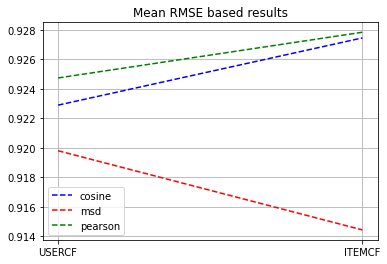

In [28]:
similarity = ["cosine","msd","pearson"]
rs = ["USERCF","ITEMCF"]
similarity_df = pd.DataFrame(columns = similarity, index = rs)
for i in range(6):
    sim = results_df["params"][i]["sim_options"]["name"]
    model = results_df["params"][i]["sim_options"]["user_based"]
    if(model == False):
        modeltype = "ITEMCF"
    else:
        modeltype = "USERCF"
    similarity_df.loc[modeltype][sim] = results_df["mean_test_rmse"][i]
print(similarity_df)
plt.figure()
plt.plot([0,1],similarity_df['cosine'],'--b',label = 'cosine')
plt.plot([0,1],similarity_df['msd'],'--r',label = 'msd')
plt.plot([0,1],similarity_df['pearson'],'--g',label = 'pearson')
plt.xticks([0,1],rs)
plt.title("Mean RMSE based results")
plt.legend()
plt.grid()
plt.show()

          cosine       msd   pearson
USERCF  0.707461  0.704231  0.705202
ITEMCF  0.710693  0.700784  0.707608


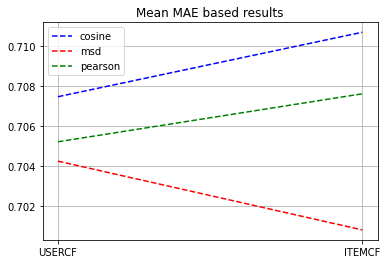

In [29]:

similarity = ["cosine","msd","pearson"]
rs = ["USERCF","ITEMCF"]
similarity_df_mae = pd.DataFrame(columns = similarity, index = rs)
for i in range(6):
    sim = results_df["params"][i]["sim_options"]["name"]
    model = results_df["params"][i]["sim_options"]["user_based"]
    if(model == False):
        modeltype = "ITEMCF"
    else:
        modeltype = "USERCF"
    similarity_df_mae.loc[modeltype][sim] = results_df["mean_test_mae"][i]
print(similarity_df_mae) 
plt.figure()
plt.plot([0,1],similarity_df_mae['cosine'],'--b',label = 'cosine')
plt.plot([0,1],similarity_df_mae['msd'],'--r',label = 'msd')
plt.plot([0,1],similarity_df_mae['pearson'],'--g',label = 'pearson')
plt.xticks([0,1],rs)
plt.title("Mean MAE based results")
plt.legend()
plt.grid()
plt.show()

**Solutions 3.f**

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

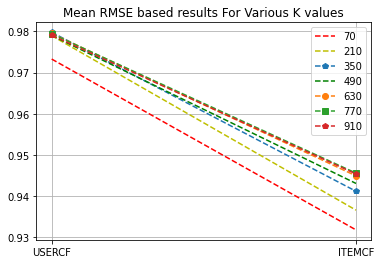

In [31]:
from surprise import KNNBasic
similarity1 = {
    "name": "msd",
    "user_based": True,
}
similarity2 = {
    "name": "msd",
    "user_based": False,
}
K_df = pd.DataFrame(index = rs)
K_column = []
for i in range(7):
    K = 70*(i+1+i);
    K_column.append(K)
K_df = pd.DataFrame(columns = K_column, index = rs)
for K in K_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = similarity1), data, measures=['RMSE','MAE'], cv=5)
    K_df.loc["USERCF"][K] = Krs['test_rmse'].mean()
for K in K_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = similarity2), data, measures=['RMSE','MAE'], cv=5)
    K_df.loc["ITEMCF"][K] = Krs['test_rmse'].mean()
print(K_df)
plt.figure()
count =0
for K in K_column:
    colour = ['r','y','p','g','o','s','p']
    prop = '--'+(colour[count%7])
    count = count +1
    plt.plot([0,1],K_df[K],prop, label = K)
    
plt.xticks([0,1],rs)
plt.title("Mean RMSE based results For Various K values")
plt.legend()
plt.grid()
plt.show()

In [36]:

from surprise import KNNBasic
similarity1 = {
    "name": "msd",
    "user_based": True,
}
similarity2 = {
    "name": "msd",
    "user_based": False,
}
K_column2 = []
for i in range(7):
    K = 7*(i+1+i);
    K_column2.append(K)
K2_df = pd.DataFrame(columns = K_column2, index = rs)
for K in K_column2:
    Krs = cross_validate(KNNBasic(k = K, sim_options = similarity1), data, measures=['RMSE','MAE'], cv=5)
    K2_df.loc["USERCF"][K] = Krs['test_rmse'].mean()
for K in K_column2:
    Krs = cross_validate(KNNBasic(k = K, sim_options = similarity2), data, measures=['RMSE','MAE'], cv=5)
    K2_df.loc["ITEMCF"][K] = Krs['test_rmse'].mean()
print(K2_df)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

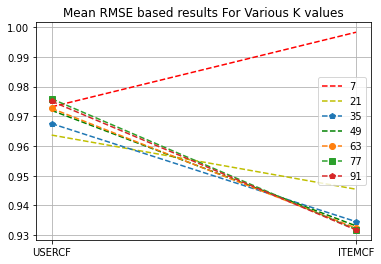

In [39]:
plt.figure()
count =0
for K in K_column2:
    colour = ['r','y','p','g','o','s','p']
    prop = '--'+(colour[count%7])
    count = count +1
    plt.plot([0,1],K2_df[K],prop, label = K)
    
plt.xticks([0,1],rs)
plt.title("Mean RMSE based results For Various K values")
plt.legend()
plt.grid()
plt.show()